In [17]:
import matplotlib.pyplot as plt
from tinygrad.tensor import Tensor
import numpy as np

In [18]:
class ImprovedEnvironment:
    def __init__(self, num_agents):
        self.num_agents = num_agents
        self.agents = [ImprovedAgent(i) for i in range(num_agents)]
        self.performance = {i: []
                            for i in range(num_agents)}  # Store performance
    def step(self):
        for agent in self.agents:
            loss = agent.observe()
            self.performance[agent.id].append(loss)

In [19]:
class ImprovedAgent:
    def __init__(self, id):
        self.id = id
        self.model = ImprovedLLM()
    def observe(self):
        observations = np.random.rand(10)
        target = np.sum(observations)
        return self.model.train(observations, target)

In [20]:
class ImprovedLLM:
    def __init__(self):
        self.w1 = Tensor(np.random.randn(5, 10), requires_grad=True)
        self.w2 = Tensor(np.random.randn(5), requires_grad=True)
    def forward(self, x):
        # Ensure x is a tinygrad Tensor and reshape it to (1, 10)
        x = Tensor(x).reshape(1, -1)
        x = self.w1.dot(x.transpose()).relu()
        return self.w2.dot(x)
    def train(self, x, y_true):
        y_pred = self.forward(x)
        # Summing to obtain a scalar tensor
        loss = ((y_pred - Tensor(y_true)) ** 2).sum()
        loss.backward()
        learning_rate = 0.01
        self.w1 = self.w1 - self.w1.grad * learning_rate
        self.w2 = self.w2 - self.w2.grad * learning_rate
        return loss.numpy()  # Convert Tensor to numpy array using numpy() method

Create environment with 3 agents

In [21]:
env = ImprovedEnvironment(3)

Assume 10 steps for training

In [22]:
for step in range(50):
    env.step()

Visualize the performance

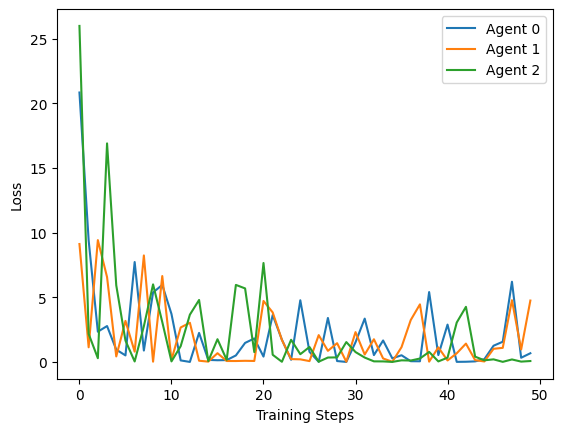

In [23]:
for agent_id, losses in env.performance.items():
    plt.plot(losses, label=f'Agent {agent_id}')
plt.legend()
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.show()